In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget http://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip

--2022-06-30 14:41:19--  http://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
Resolving infolab.tamu.edu (infolab.tamu.edu)... 45.55.217.29
Connecting to infolab.tamu.edu (infolab.tamu.edu)|45.55.217.29|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip [following]
--2022-06-30 14:41:20--  https://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
Connecting to infolab.tamu.edu (infolab.tamu.edu)|45.55.217.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263659672 (251M) [application/zip]
Saving to: ‘social_honeypot_icwsm_2011.zip’

social_honeypot_icw 100%[===================>] 251.45M  16.1MB/s    in 19s     

2022-06-30 14:41:40 (13.4 MB/s) - ‘social_honeypot_icwsm_2011.zip’ saved [263659672/263659672]



In [ ]:
!unzip social_honeypot_icwsm_2011.zip

Archive:  social_honeypot_icwsm_2011.zip
   creating: social_honeypot_icwsm_2011/
  inflating: social_honeypot_icwsm_2011/content_polluters.txt  
   creating: __MACOSX/
   creating: __MACOSX/social_honeypot_icwsm_2011/
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters.txt  
  inflating: social_honeypot_icwsm_2011/content_polluters_followings.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters_followings.txt  
  inflating: social_honeypot_icwsm_2011/content_polluters_tweets.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters_tweets.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._legitimate_users.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users_followings.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._legitimate_users_followings.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users_tweets.txt  
  inflating: __MACOSX/soci

In [ ]:
import pandas as pd
import numpy as np
import re, string

from scipy.stats import zscore
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import scikitplot as skplt
import matplotlib.pyplot as plt

In [ ]:
def func(string):
   return pd.Series(string.split(',')).astype(int)
   
dfContent_polluters_followings = pd.read_csv('social_honeypot_icwsm_2011/content_polluters_followings.txt',sep='\t', names=
                 ["UserID","SeriesOfNumberOfFollowings"],converters={"SeriesOfNumberOfFollowings":func},index_col=0)



In [ ]:
dfContent_polluters_followings = dfContent_polluters_followings.head(10)
dfContent_polluters_followings

,SeriesOfNumberOfFollowings
UserID,
6301,0 3269 1 3310 2 3339 3 338...
10836,0 1949 1 1963 2 1963 3 196...
10997,0 1119 1 1119 2 999 3 99...
633293,0 2174 1 2651 2 2676 3 267...
717883,0 7731 1 7737 2 7737 3 774...
763068,0 120 1 120 2 120 3 109 4 ...
783705,0 1660 1 1662 2 1664 3 166...
788352,0 1320 1 1320 2 1320 3 132...
810011,0 11239 1 11239 2 11239 3 ...


In [ ]:


node_list = []

for UserID , SeriesOfNumberOfFollowings in dfContent_polluters_followings.itertuples():
    node_list.append(int(UserID))
    for fo in SeriesOfNumberOfFollowings:
        node_list.append(int(fo))
    # node_list += SeriesOfNumberOfFollowings 

#for x in range(len(node_list)):
#    print(node_list[x])

# Convert a list to a set to get the unique ids, and then back to a list
node_list = list(set(node_list))
print(len(node_list))



948


In [ ]:


edge_list = []

for UserID , SeriesOfNumberOfFollowings in dfContent_polluters_followings.itertuples():
    for fo in SeriesOfNumberOfFollowings:
        # print(UserID , "     -      ", fo)
        # clean user_id and follower id
        # us_id = str(user_id)
        # fo_id = str(data.get(user_id)[fo])
        edge_list.append((int(UserID), int(fo)))

# for x in range(len(edge_list)):
#     print(edge_list[x])



In [ ]:
print(len(edge_list))

2147


In [ ]:
import networkx as nx
import numpy as np
import community
from community import community_louvain
import matplotlib.pyplot as plt
import networkx as nx
import functools
from operator import mul

In [ ]:


G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)



In [ ]:
# Computes the partition of the graph nodes which maximises the modularity using the Louvain heuristics algorithm. 
# This is the partition of highest modularity.
part = community_louvain.best_partition(G)

In [ ]:


# Computes the modularity of a partition of a graph
mod = community_louvain.modularity(part,G)



In [ ]:
# Plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]

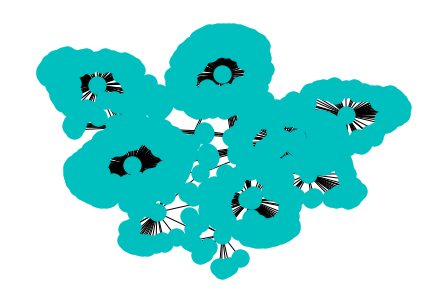

In [ ]:
nx.draw(G, pos=nx.spring_layout(G,k=.12),node_color='c',edge_color='k')

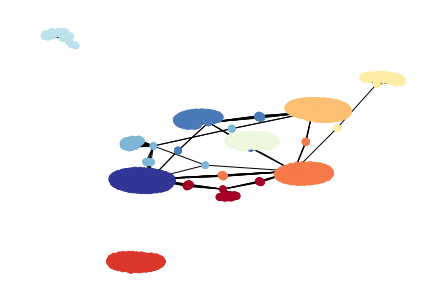

In [ ]:

nx.draw_spring(G, cmap=plt.cm.RdYlBu, node_size=50, node_color = values, font_size=12, with_labels=False, font_family='sans-serif')


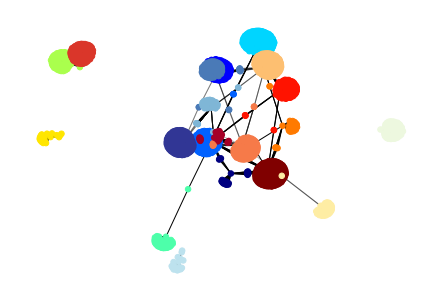

The Modularity of the Community Partitioning is:  0.8089783335870545


In [ ]:

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)

pos = nx.spring_layout(G)  # compute graph layout
nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=values)
nx.draw_networkx_edges(G, pos,edgelist=edge_list, alpha=0.3)

plt.show()

print('The Modularity of the Community Partitioning is: ', community_louvain.modularity(part,G))

In [ ]:

from networkx import edge_betweenness_centrality

from random import random

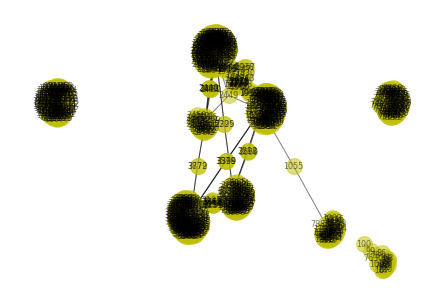

In [ ]:
nx.draw(G,pos=nx.spring_layout(G),with_labels=True,font_size=8,node_color='y',node_size=250,alpha=0.5)
plt.show()

In [ ]:


#Function to calculate edge betweenness for every edge 

def most_central_edge(G):
    centrality = edge_betweenness_centrality(G)

    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    centrality = {e: c / max_cent for e, c in centrality.items()} 
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    
    #returning most central edge
    return max(centrality, key=centrality.get)



In [ ]:
#Function to get communiites by  above algorithm
def Get_Communities():
    
    community=[]
    from networkx.algorithms.community.centrality import girvan_newman
    comp = girvan_newman(Graph, most_valuable_edge=most_central_edge)
    
    for i in range(4):
        #tuple till depth 4(divisive clustering)
        communities_detected = next(comp)
    
    community=communities_detected
    return community

In [ ]:
Graph = G

In [ ]:


print('Number of nodes in graph G=',G.number_of_nodes())



Number of nodes in graph G= 948


(-1.206750230193138,
 1.1758000415563583,
 -1.1336639559268953,
 0.9919601118564606)

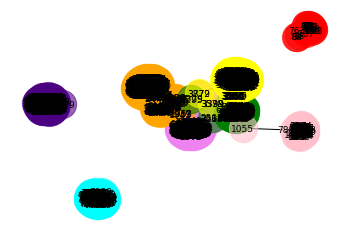

In [ ]:


pos=nx.spring_layout(Graph)
#Assigning colors to communities
colors = ["violet","orange","cyan","red","green","yellow","indigo","pink"]
#getting different communities in a list for different colors
list_of_comm=Get_Communities()
#drawing graph based on communities
for i in range(len(list_of_comm)):
    comm_graph=list_of_comm[i]
    nlist = [node for node in comm_graph]
    nx.draw_networkx_nodes(Graph,pos,nodelist=nlist,node_color=colors[i%10],node_size=800,alpha=0.6)
     
nx.draw_networkx_edges(Graph,pos)
nx.draw_networkx_labels(Graph,pos,font_size=9)

#Resizing the graph for better visualization
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 15 and height to 12
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.axis('off')

